## Predictive modeling of customer bookings

____________________________________________________________

## Goal: Create a predictive model for customer bookings and assess the importance of each feature

Context on dataset:
- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("data/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [4]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [5]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [6]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [7]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


Only 15% of bookings were complete (inbalanced dataset), purchase_lead and length_of_stay probably has some extreme outliers.

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df['booking_origin'].value_counts()

booking_origin
Australia               17872
Malaysia                 7174
South Korea              4559
Japan                    3885
China                    3387
                        ...  
Panama                      1
Tonga                       1
Tanzania                    1
Bulgaria                    1
Svalbard & Jan Mayen        1
Name: count, Length: 104, dtype: int64

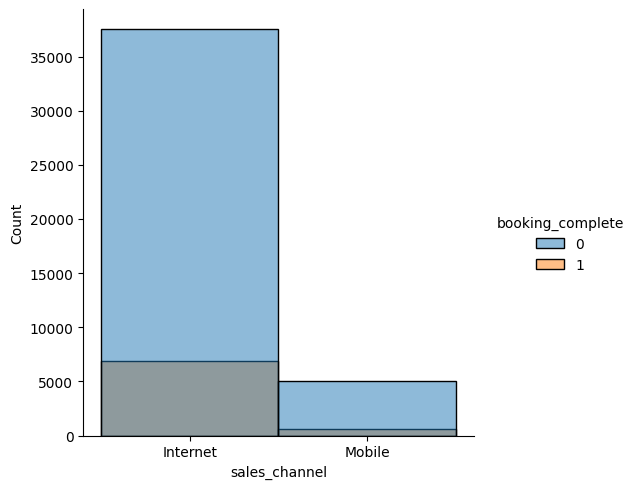

In [10]:
sns.displot(data=df, x='sales_channel', hue='booking_complete')

<Axes: >

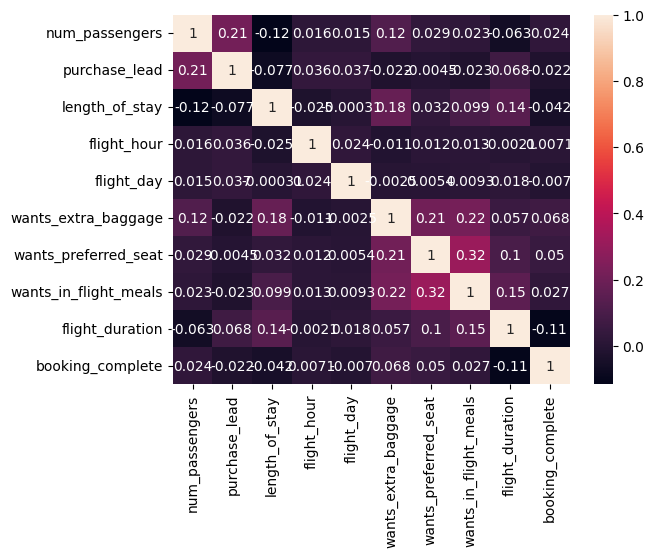

In [11]:
sns.heatmap(df.select_dtypes(include='number').corr(),annot=True)

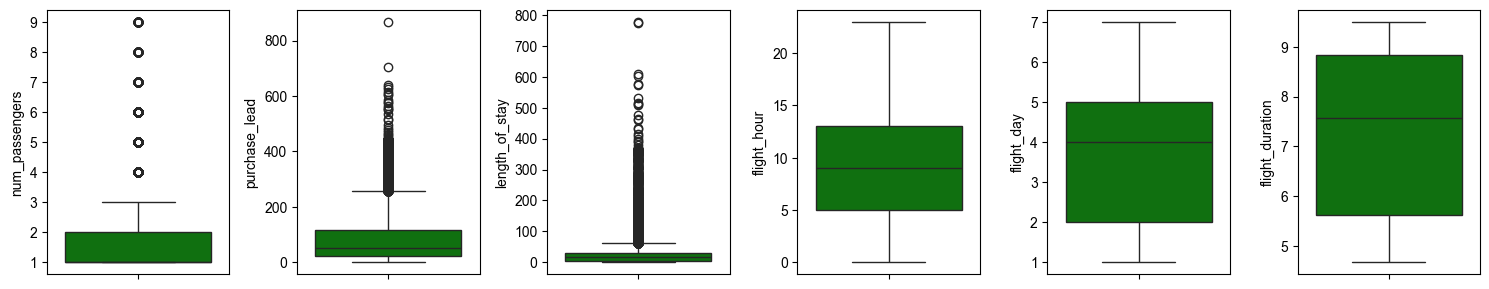

In [12]:
l = ['num_passengers','purchase_lead','length_of_stay','flight_hour','flight_day','flight_duration']
fig, axes = plt.subplots(1, len(l),figsize=(15,3), sharey=False)
sns.set_style('whitegrid')
for i, col in enumerate(l):
    sns.boxplot(df[col],color='green',orient='v', ax=axes[i])
plt.tight_layout()
plt.show()

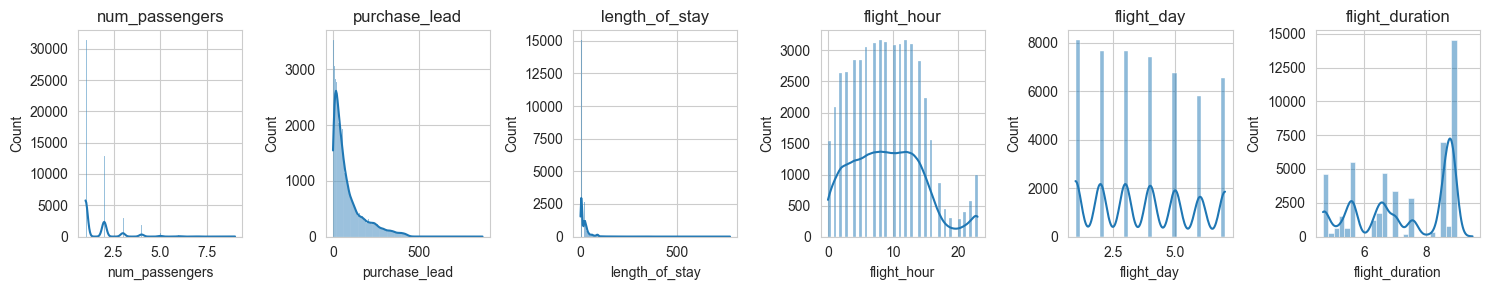

In [13]:
fig, axes = plt.subplots(1, len(l),figsize=(15,3), sharey=False)
for i, col in enumerate(l):
    sns.histplot(df[col],kde=True, ax=axes[i])
    axes[i].set_title(f'{col}')
plt.tight_layout()
plt.show()

There are major outliers in the purchase_lead, length_of_stay, and num_passengers columns that can be removed.

In [14]:
from scipy import stats

In [15]:
def remove_outliers(df, col, threshold=3):
    z_scores = np.abs(stats.zscore(df[col]))
    filtered_df = df[(z_scores < threshold)]
    return filtered_df

In [16]:
for col in ['purchase_lead','length_of_stay','num_passengers']:
    df = remove_outliers(df,col)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47150 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         47150 non-null  int64  
 1   sales_channel          47150 non-null  object 
 2   trip_type              47150 non-null  object 
 3   purchase_lead          47150 non-null  int64  
 4   length_of_stay         47150 non-null  int64  
 5   flight_hour            47150 non-null  int64  
 6   flight_day             47150 non-null  int64  
 7   route                  47150 non-null  object 
 8   booking_origin         47150 non-null  object 
 9   wants_extra_baggage    47150 non-null  int64  
 10  wants_preferred_seat   47150 non-null  int64  
 11  wants_in_flight_meals  47150 non-null  int64  
 12  flight_duration        47150 non-null  float64
 13  booking_complete       47150 non-null  int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 5.4+ MB


In [18]:
47150/50000

0.943

Removing the outliers was a loss of about 5% of the total data, an acceptable loss to increase the accuracy of our model.

c:\Users\zoren\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:1606: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\zoren\AppData\Local\Temp\ipykernel_11108\4251701445.py:4: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:green'` for the same effect.

  sns.boxplot(data= df, x= col,color='green',orient='v', ax=axes[0,i], hue='booking_complete')
c:\Users\zoren\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:1606: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\zoren\AppData\Local\Temp\ipykernel_11108\4251701445.py:4: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:green'` for the same effect.

  sns.boxplot(data= d

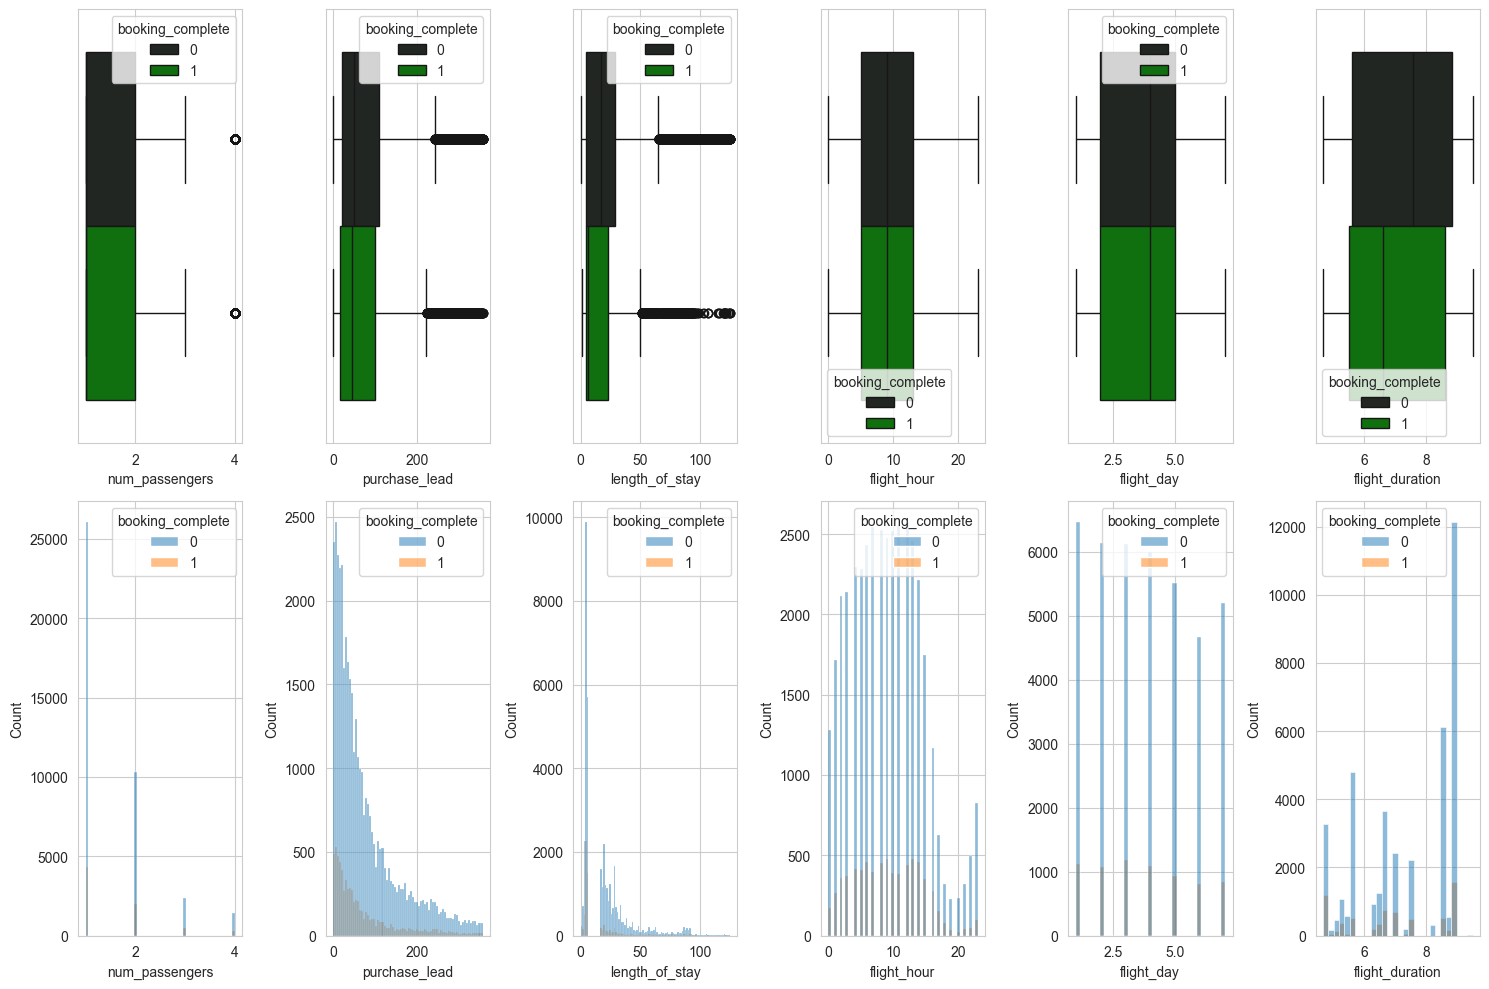

In [19]:
fig, axes = plt.subplots(2, len(l),figsize=(15,10), sharey=False)
sns.set_style('whitegrid')
for i, col in enumerate(l):
    sns.boxplot(data= df, x= col,color='green',orient='v', ax=axes[0,i], hue='booking_complete')
    sns.histplot(data=df, x=col, ax=axes[1,i], hue='booking_complete')
plt.tight_layout()
plt.show()

<Axes: xlabel='purchase_lead', ylabel='length_of_stay'>

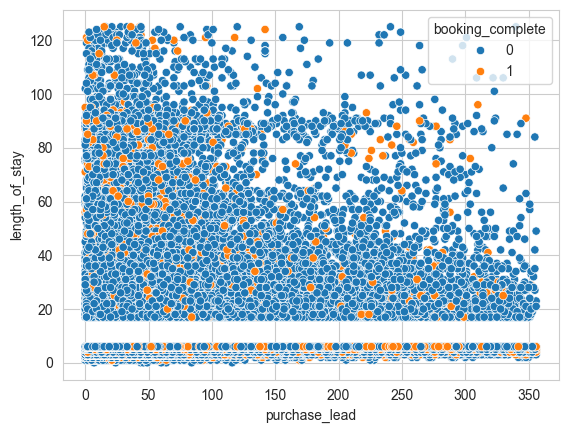

In [20]:
sns.scatterplot(data=df, x='purchase_lead',y='length_of_stay', hue='booking_complete')

Based on the above analysis, flight day and flight hour don't seem to have much of an influence over a customer booking a flight. Next, let's explore some of the categorical features.

In [21]:
cats = df.select_dtypes('object').columns.values
cats

array(['sales_channel', 'trip_type', 'route', 'booking_origin'],
      dtype=object)

In [22]:
for col in cats:
    print(df[col].nunique())
    print(df[col].value_counts())

2
sales_channel
Internet    41806
Mobile       5344
Name: count, dtype: int64
3
trip_type
RoundTrip     46667
OneWay          372
CircleTrip      111
Name: count, dtype: int64
797
route
AKLKUL    2421
PENTPE     873
MELSGN     818
ICNSIN     775
DMKKIX     667
          ... 
KCHMRU       1
ICNJED       1
BBIMEL       1
BBIPER       1
MRUXIY       1
Name: count, Length: 797, dtype: int64
104
booking_origin
Australia               17166
Malaysia                 6623
South Korea              4288
Japan                    3714
China                    3118
                        ...  
Tanzania                    1
Jordan                      1
Lebanon                     1
Tonga                       1
Svalbard & Jan Mayen        1
Name: count, Length: 104, dtype: int64


Here we can see that most sales were via the internet, most bookings were round trips and there were many different booking_origins and routes. Lets reduce the number of categories for routes and booking origin.

<Axes: ylabel='count'>

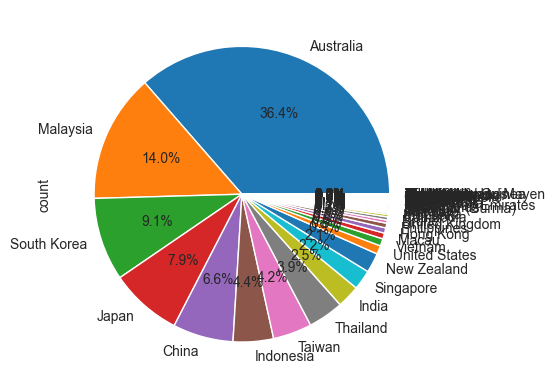

In [23]:
counts = df['booking_origin'].value_counts()
counts.plot.pie(autopct='%1.1f%%')

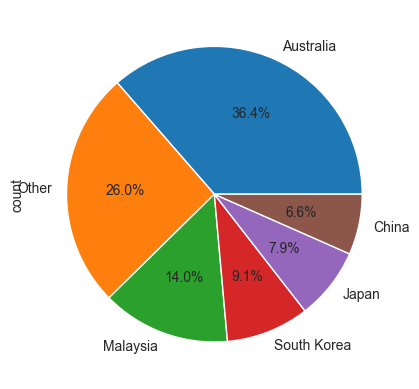

In [24]:
threshold = 0.05
mask = counts / len(df) >= threshold
filtered_cats = counts[mask].index
df['booking_origin_grpd'] = df['booking_origin'].where(df['booking_origin'].isin(filtered_cats), 'Other')
df['booking_origin_grpd'].value_counts().plot.pie(autopct='%1.1f%%')
df.drop(['booking_origin'],inplace=True,axis=1)
df.rename(columns={'booking_origin_grpd':'booking_origin'}, inplace=True)

<Axes: ylabel='count'>

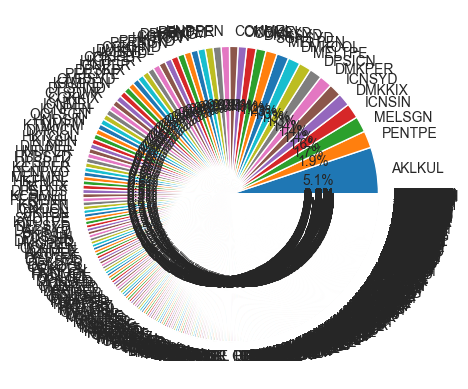

In [25]:
df['route'].value_counts().plot.pie(autopct='%1.1f%%')

While the booking origin category was able to be reduced, the route category varies too wildly to be used as a predictor.

<Axes: xlabel='sales_channel', ylabel='count'>

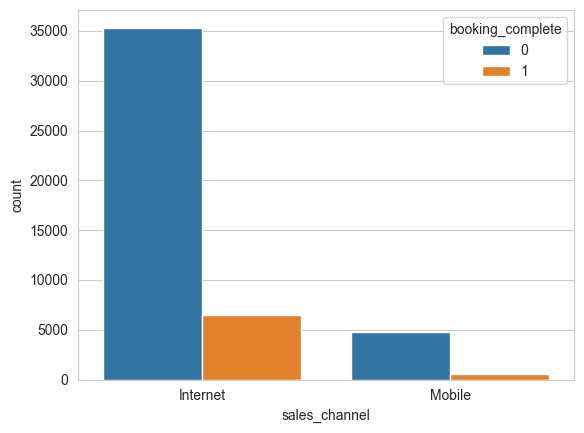

In [26]:
sns.countplot(data=df, x='sales_channel', hue='booking_complete')

In [27]:
df.groupby('sales_channel')['booking_complete'].value_counts(normalize=True).unstack() * 100


booking_complete,0,1
sales_channel,,
Internet,84.521361,15.478639
Mobile,89.277695,10.722305


In [28]:
for col in ['wants_extra_baggage','wants_preferred_seat','wants_in_flight_meals']:
    print(df.groupby(col)['booking_complete'].value_counts(normalize=True).unstack()*100)

booking_complete             0          1
wants_extra_baggage                      
0                    88.465669  11.534331
1                    83.339187  16.660813
booking_complete              0          1
wants_preferred_seat                      
0                     86.224890  13.775110
1                     82.302086  17.697914
booking_complete               0          1
wants_in_flight_meals                      
0                      85.865306  14.134694
1                      83.976911  16.023089


People who want additional services seem to be slightly more likely to book their flights, lets combine these 3 categories into 1.

In [29]:
df['wants_extra_services'] = df['wants_extra_baggage'] + df['wants_in_flight_meals'] + df['wants_preferred_seat']
df['wants_extra_services'] = df['wants_extra_services'].map(lambda x: 1 if x >= 1 else 0)

In [30]:
df['internet_sale'] = df['sales_channel'].map({'Internet': 1, 'Mobile': 0})

In [31]:
from sklearn.preprocessing import OneHotEncoder

encode = OneHotEncoder()
enc_origins = pd.DataFrame(encode.fit_transform(df[['booking_origin']]).toarray())
enc_origins.columns = encode.get_feature_names_out(['booking_origin'])
df = df.join(enc_origins)

In [32]:
X = df.drop(['sales_channel','trip_type','flight_hour','flight_day','route','booking_origin','wants_extra_baggage','wants_preferred_seat','wants_in_flight_meals','booking_complete'],axis=1)
y = df['booking_complete']


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [35]:
import xgboost as xgb

train = xgb.DMatrix(X_train, label=y_train)
test = xgb.DMatrix(X_test, label=y_test)

In [36]:
param = {
    'max_depth' : 4,
    'eta' : 0.1,
    'num_class' : 2}
epochs = 15

Adjusting for the case of our unbalanced target data via ratio...

In [53]:
ratio = len(df[df['booking_complete']==0]) / len(df[df['booking_complete']==1])

In [45]:
clf = xgb.XGBClassifier()
clf.set_params(scale_pos_weight=ratio, max_depth = 5)
clf.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [39]:
model = xgb.train(param, train, epochs)

In [40]:
preds = model.predict(test)
print(confusion_matrix(y_test,preds))
print(classification_report(y_test,preds))

[[8031    0]
 [1399    0]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      8031
           1       0.00      0.00      0.00      1399

    accuracy                           0.85      9430
   macro avg       0.43      0.50      0.46      9430
weighted avg       0.73      0.85      0.78      9430



c:\Users\zoren\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\zoren\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\zoren\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [46]:
preds2 = clf.predict(X_test)
print(confusion_matrix(y_test,preds2))
print(classification_report(y_test,preds2))

[[5323 2708]
 [ 587  812]]
              precision    recall  f1-score   support

           0       0.90      0.66      0.76      8031
           1       0.23      0.58      0.33      1399

    accuracy                           0.65      9430
   macro avg       0.57      0.62      0.55      9430
weighted avg       0.80      0.65      0.70      9430



Since the first model was only predicting one class, lets try oversampling the miniority class to try and balance the target data

In [42]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy=0.5)
X_resamp, y_resamp = ros.fit_resample(X_train, y_train)

train_os = xgb.DMatrix(X_resamp, label=y_resamp)

In [43]:
model = xgb.train(param, train_os, epochs)
preds = model.predict(test)
print(confusion_matrix(y_test,preds))
print(classification_report(y_test,preds))

[[7614  417]
 [1195  204]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      8031
           1       0.33      0.15      0.20      1399

    accuracy                           0.83      9430
   macro avg       0.60      0.55      0.55      9430
weighted avg       0.78      0.83      0.80      9430



Ultimately, I think it is best to minimize false negatives (missing potential customers) for this application, therefore I will use the model with the weighted ratio hyperparameter.

In [62]:
weights = clf.get_booster().get_score(importance_type='gain')
weight_list = {x: y for x, y in sorted(weights.items(), key=lambda item: item[1], reverse=True)}
print(weight_list)

{'wants_extra_services': 41.353050231933594, 'flight_duration': 22.65885353088379, 'internet_sale': 17.56818389892578, 'booking_origin_China': 14.031664848327637, 'length_of_stay': 12.884469032287598, 'booking_origin_South Korea': 11.309834480285645, 'booking_origin_Australia': 11.027257919311523, 'booking_origin_Malaysia': 10.02894115447998, 'booking_origin_Other': 9.472691535949707, 'num_passengers': 9.338536262512207, 'purchase_lead': 8.546381950378418, 'booking_origin_Japan': 7.665535926818848}


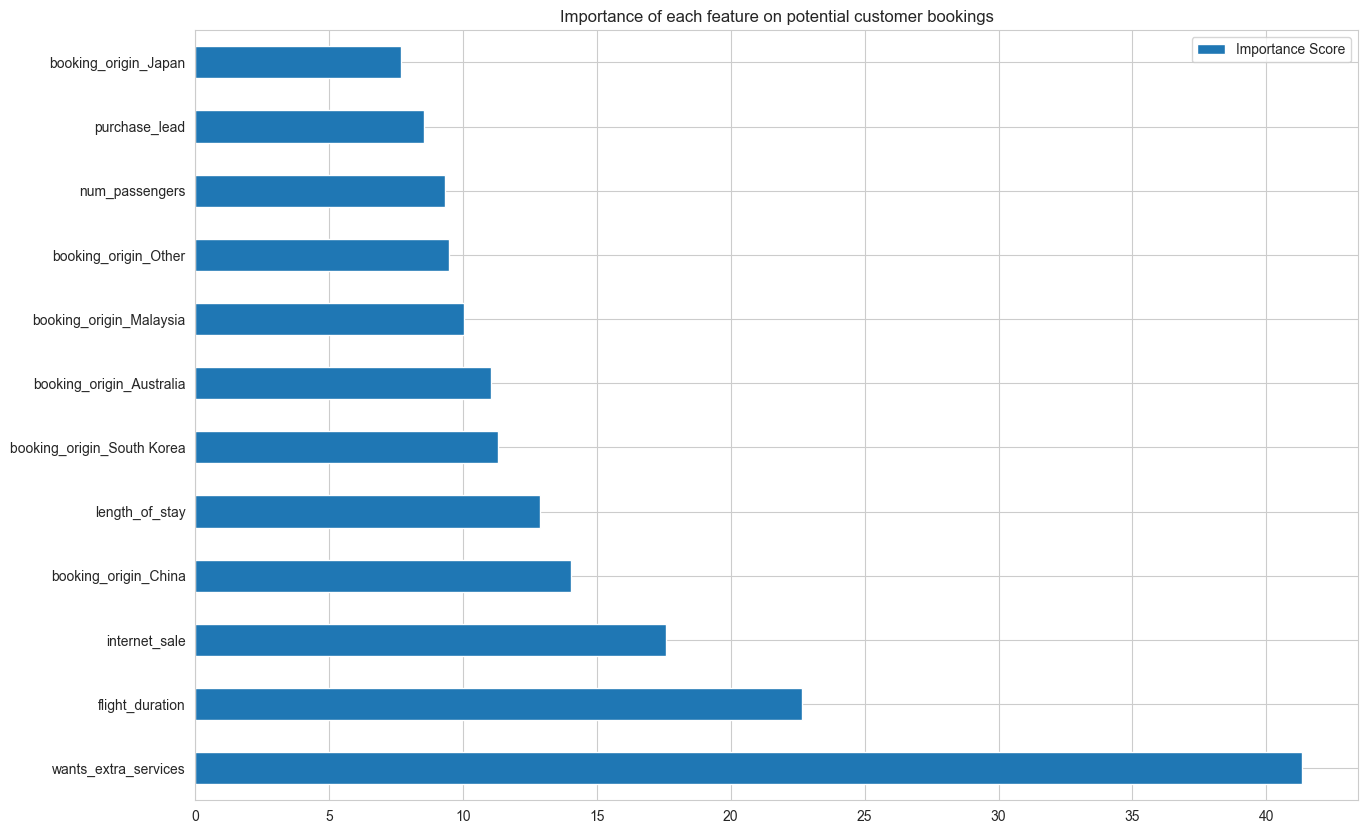

In [66]:
feat_weights = pd.DataFrame.from_dict(weight_list, orient='index', columns=['Importance Score'])
feat_weights.plot(kind='barh',figsize=(15,10))
plt.title('Importance of each feature on potential customer bookings')
plt.show()